In [4]:
from google.protobuf import text_format
from ffn.inference import inference
from ffn.inference import inference_pb2

In [5]:
config = '''image {
  hdf5: "third_party/neuroproof_examples/training_sample2/grayscale_maps.h5:raw"
}
image_mean: 128
image_stddev: 33
checkpoint_interval: 1800
seed_policy: "PolicyPeaks"
model_checkpoint_path: "tmp/model.ckpt-10000"
model_name: "convstack_3d.ConvStack3DFFNModel"
model_args: "{\\"depth\\": 6, \\"fov_size\\": [11, 11, 11], \\"deltas\\": [4, 4, 4]}"
segmentation_output_dir: "results/fib25/training2"
inference_options {
  init_activation: 0.95
  pad_value: 0.05
  move_threshold: 0.9
  min_boundary_dist { x: 1 y: 1 z: 1}
  segment_threshold: 0.6
  min_segment_size: 1000
}'''
req = inference_pb2.InferenceRequest()
_ = text_format.Parse(config, req)

In [6]:
runner = inference.Runner()
runner.start(req)
canvas, alignment = runner.make_canvas((0, 0, 0), (250, 250, 250))

C:\Users\Tanch\ffn\ffn\inference\storage.py:62: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  volume = h5py.File(path[0])[path[1]]



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


INFO:tensorflow:Restoring parameters from tmp/model.ckpt-10000


INFO:tensorflow:Restoring parameters from tmp/model.ckpt-10000


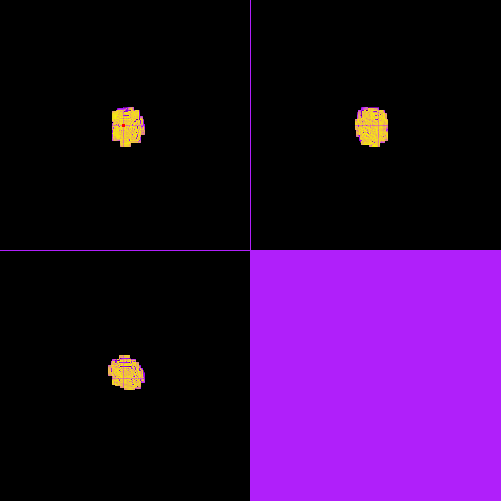

130

In [7]:
# Create a single segment, starting from the specified origin point.
canvas.segment_at((125, 125, 125),  # zyx
                  dynamic_image=inference.DynamicImage(),
                  vis_update_every=1)

In [8]:
from ffn.utils import bounding_box_pb2
from ffn.inference import inference
from ffn.inference import inference_flags

In [9]:
bbox = bounding_box_pb2.BoundingBox()
bounding_box = 'start { x:0 y:0 z:0 } size { x:250 y:250 z:250 }'
text_format.Parse(bounding_box, bbox)

start {
  x: 0
  y: 0
  z: 0
}
size {
  x: 250
  y: 250
  z: 250
}

In [10]:
runner.run((bbox.start.z, bbox.start.y, bbox.start.x),
             (bbox.size.z, bbox.size.y, bbox.size.x))

In [62]:
from ffn.inference import storage

seg, _ = storage.load_segmentation('results/fib25/training2', (0, 0, 0))

In [68]:
import numpy as np
training1 = np.load('results/fib25/training2/0/0/seg-0_0_0.npz', allow_pickle=True)

In [69]:
training1.files

['segmentation', 'origins', 'request', 'counters', 'overlaps']

In [70]:
training1['segmentation'].shape

(250, 250, 250)

In [82]:
from tensorflow import gfile

filename = 'results/fib25/training2/0/0/seg-0_0_0.npz'
with gfile.Open(filename, "rb") as f:
    data2 = np.load(f, allow_pickle=True)
    if 'segmentation' in data2:
        seg3 = data2['segmentation']

In [83]:
seg3.shape

(250, 250, 250)

In [73]:
seg.shape

(250, 250, 250)

In [17]:
from brainlit.utils.session import NeuroglancerSession
from brainlit.utils.swc import graph_to_paths
import napari

D:\Anaconda3\envs\brainlit\lib\site-packages\napari\__init__.py:44: UserWarning: 
    napari was tested with QT library `>=5.12.3`.
    The version installed is 5.9.6. Please report any issues with this
    specific QT version at https://github.com/Napari/napari/issues.
    
  warn(message=warn_message)


In [18]:
dir = "s3://open-neurodata/brainlit/brain1"
dir_segments = "s3://open-neurodata/brainlit/brain1_segments"
mip = 0
v_id = 0
radius = 75

In [19]:
# get image and center point
ngl_sess = NeuroglancerSession(mip = mip, url = dir, url_segments=dir_segments)
img, bbox, vox = ngl_sess.pull_voxel(2, v_id, radius)
print(f"\n\nDownloaded volume is of shape {img.shape}, with total intensity {sum(sum(sum(img)))}.")

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.23it/s]



Downloaded volume is of shape (151, 151, 151), with total intensity 4946609.


In [89]:
import h5py
filename = "third_party/neuroproof_examples/training_sample2/grayscale_maps.h5"

with h5py.File(filename, "r") as f:
     # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
    training2 = np.array(data)

Keys: <KeysViewHDF5 ['raw']>


In [75]:
seg2 = training1["segmentation"]

In [76]:
sum(sum(sum(seg)))

1029121992.0

In [77]:
sum(sum(sum(seg2)))

32300

In [45]:
output = seg2.astype(np.uint64)

In [46]:
output.shape

(250, 250, 250)

In [47]:
sum(sum(sum(output)))

20899884.0

In [84]:
sum(sum(sum(seg3)))

32300

In [90]:
with napari.gui_qt():
    viewer = napari.Viewer(ndisplay=3)
    viewer.add_image(seg)
    viewer.add_image(output)
    viewer.add_image(training2)